In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import statsmodels.formula.api as sm

In [14]:
# Importing the dataset
dataset=pd.read_csv('Salary_Data.csv')

# Import dataset
# Placed at x-y axis
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values
print("Before reduce dimension ",x.shape)

# Reduce the dimension for validation
# Place the data to x axis
x = np.squeeze(x)
y = np.squeeze(y)
print("After reduce dimension ",x.shape)

Before reduce dimension  (30, 1)
After reduce dimension  (30,)


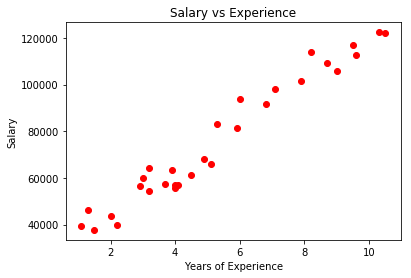

In [15]:
# Visualising the dataset
plt.scatter(x,y,color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [16]:
# Mean
def mean(x):
    sum = 0.0
    for i in x:
        sum = sum + i
    return sum / len(x)

# Variance
def var(x):
    m = mean(x)
    sum = 0.0
    for i in x:
        sub = (i - m) ** 2
        sum = sum + sub
    return sum / len(x)

# Standard Deviation
def std(x):
    return math.sqrt(var(x))

mean(x),var(x),std(x)

(5.3133333333333335, 7.785155555555554, 2.790189161249745)

In [17]:
# Library mean
mean = np.mean(x)

# Library variance
var = np.var(x)

# Library Standard Deviation
std = np.std(x)

mean,var,std

(5.3133333333333335, 7.785155555555556, 2.790189161249745)

In [18]:
class Linear_Regression():
    def __init__(self):
        self.__m = 0
        self.__n = 0
        
    def Linear_Model(self,x,y):
        mean_x = np.mean(x)
        mean_y = np.mean(y)
    
        # Ordinary Least Square
        Cov_xy = np.sum((x - mean_x) * (y - mean_y)) / np.size(x) # Covariance
        Var_x  = np.sum((x - mean_x) ** 2) / np.size(x) # Variance
    
        m = Cov_xy / Var_x
        n = np.mean(y) - m * np.mean(x)
    
        return m,n
    
    def fit(self,x,y):
        self.__m,self.__n = self.Linear_Model(x,y)
        
    def predict(self,x):
        y = self.__m * x + self.__n
        return y

In [19]:
class Metrics():
    """metrics for functions"""
    def __init__(self):
        None
    
    # Mean Squared Error
    def mean_squared_error(self,y_train,y_pred):
        mse = np.sum((y_pred - y_train) ** 2) / len(y_train)
        return mse
    #R Squared Score - Coefficient of Determination
    def r_squared_score(self,y_train,y_pred,y = None,penalize = 0):
        # sum of squared errors of our regression model
        sse = np.sum((y_train - y_pred) ** 2)
        # sum of squared errors of our baseline model.
        sst = np.sum((y_train - np.mean(y_train)) ** 2)
        # coefficient of determination
        cod = 1 - (sse / sst)
        
        if penalize == 0:
            return cod
        elif penalize == 1:
            # Adjusted R squared
            acod = 1 - (1 - cod) * ((np.size(y) - 1) / (np.size(y) - np.size(y_train) - 1))
            return acod
        
            

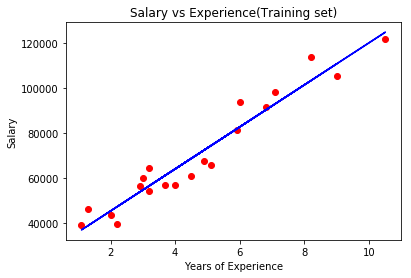

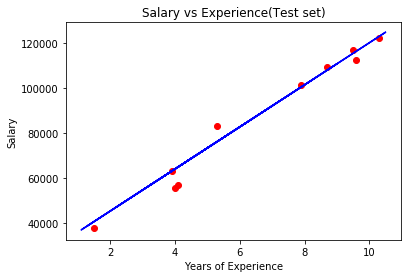

In [20]:
#Importing the dataset
dataset=pd.read_csv('Salary_Data.csv')

X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,1].values

#Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=1/3, random_state = 0)

#Reduce the dimentionality for validation
X_train = np.squeeze(X_train)
X_test = np.squeeze(X_test)
Y_train = np.squeeze(Y_train)
Y_test = np.squeeze(Y_test)

#Fitting Simple Linear Regression to the Training set
regressor=Linear_Regression()
regressor.fit(X_train,Y_train)

#Predicting the Test set result
Y_pred=regressor.predict(X_test)

#Visualising the Training set
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Salary vs Experience(Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#Visualising the Test set
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Salary vs Experience(Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [21]:
metrics = Metrics()

#Mean squared error regression loss
print('Mean Squared Error: ',metrics.mean_squared_error(Y_train,regressor.predict(X_train)))

#R squared score - Coefficient of determination
print('Coefficient of Determination: ',metrics.r_squared_score(Y_train,regressor.predict(X_train),penalize = 0))

#Adjusted R squared score - Coefficient of determination
print('Adjusted R Squared: ',metrics.r_squared_score(Y_train,regressor.predict(X_train),Y,penalize = 1))

Mean Squared Error:  36852948.76438455
Coefficient of Determination:  0.9381900012894278
Adjusted R Squared:  0.8008344485992672


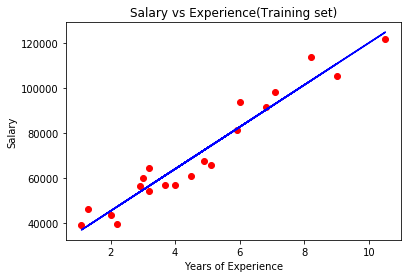

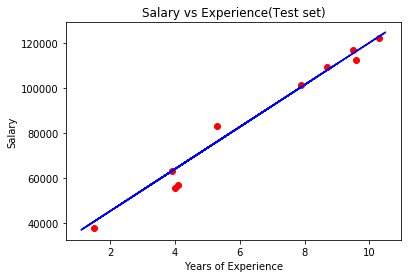

In [24]:
#Importing the dataset
dataset=pd.read_csv('Salary_Data.csv')

X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,1].values

#Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=1/3, random_state = 0)

#Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

#Predicting the Test set result
Y_pred=regressor.predict(X_test)

#Visualising the Training set
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Salary vs Experience(Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#Visualising the Test set
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Salary vs Experience(Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [25]:
# COMPARING SKLEARN LIBRARY VS IMPLEMENTATION FROM SCRATCH
from sklearn.metrics import mean_squared_error,r2_score

#Mean squared error regression loss
print('Mean Squared Error: ',mean_squared_error(Y_train,regressor.predict(X_train)))

#R squared score - Coefficient of determination
print('Coefficient of Determination: ',r2_score(Y_train,regressor.predict(X_train)))

Mean Squared Error:  36852948.76438455
Coefficient of Determination:  0.9381900012894278
